##  Step 1 .  Reading , Understanding the visualising the Data

In [215]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
titanic = pd.read_csv('train.csv')

In [218]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
titanic.shape


(891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [219]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [220]:
# do a sanity check on the dataframe for missing values.
# percentage of missing values in each column
round(titanic.isnull().sum()/len(titanic.index), 2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [221]:
# Dropping Duplicates if any
titanic=titanic.drop_duplicates()
titanic.shape

(891, 12)

In [178]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
tit1 = titanic.fillna(0)

In [223]:
tit1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [224]:
round(tit1.isnull().sum()/len(tit1.index), 2)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [225]:
#tit1.drop('Fare',axis=1,inplace=True)
tit1.drop('Ticket',axis=1,inplace=True)
tit1.drop('Name',axis=1,inplace=True)
tit1.drop('Cabin',axis=1,inplace=True)

In [226]:
tit1['Sex'].unique()

array(['male', 'female'], dtype=object)

In [227]:
tit1['Sex'].replace('female',0,inplace=True)
tit1['Sex'].replace('male',1,inplace=True)

In [228]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(tit1['Embarked'], drop_first=True)
# Adding the results to the master dataframe
tit1 = pd.concat([tit1, dummy1], axis=1)

In [231]:
tit1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [230]:
tit1.drop('Embarked',axis=1,inplace=True)

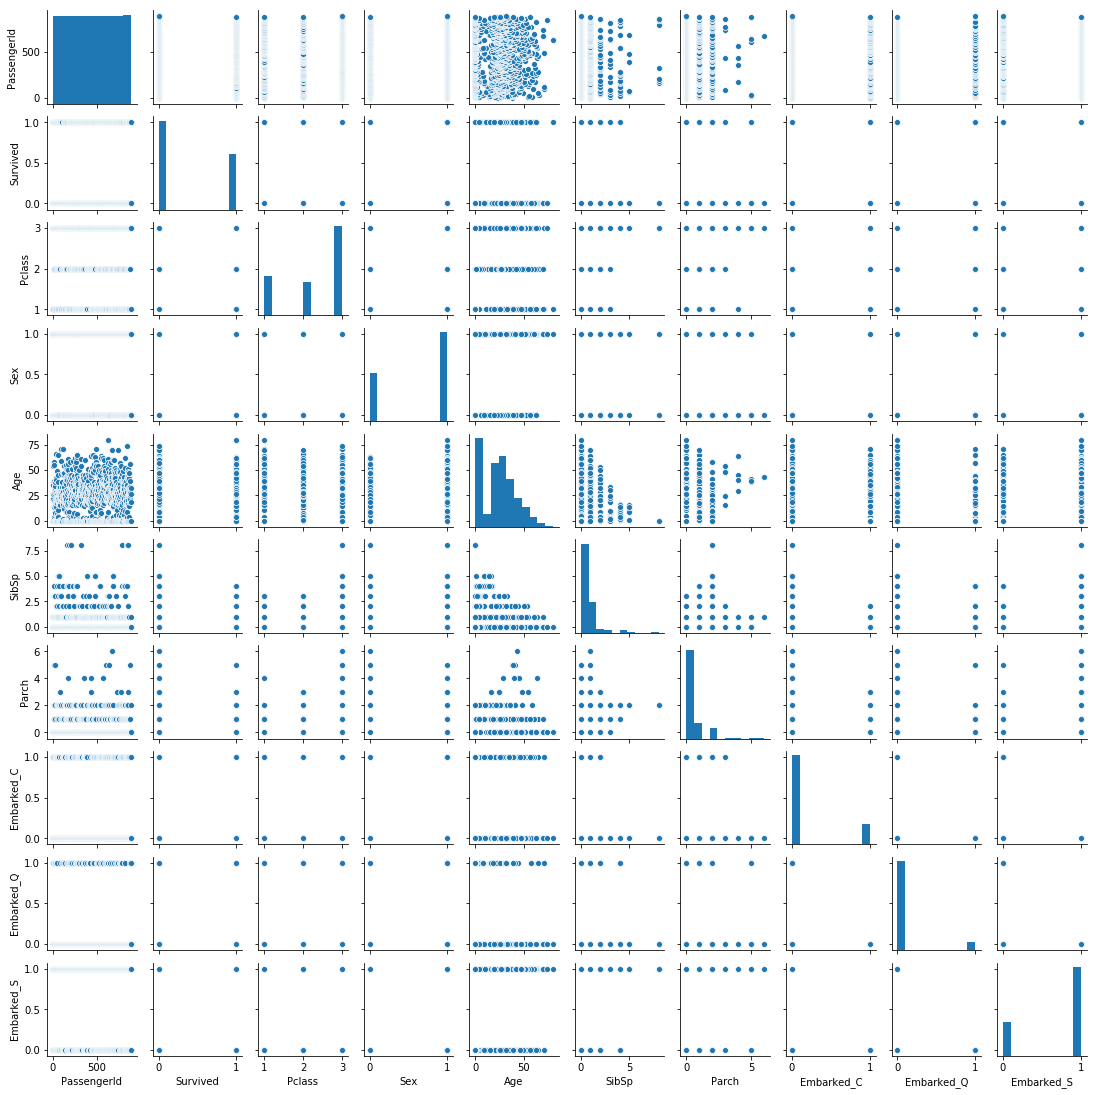

In [129]:
g=sns.pairplot(tit1)
#plt.figure(figsize=(405,400))
g.fig.set_size_inches(15,15)
plt.show()

In [130]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
tit1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,1.000000
90%,802.000000,1.000000,3.000000,1.000000,47.000000,1.000000,2.000000,1.000000,0.000000,1.000000
95%,846.500000,1.000000,3.000000,1.000000,54.000000,3.000000,2.000000,1.000000,1.000000,1.000000
99%,882.100000,1.000000,3.000000,1.000000,65.000000,5.000000,4.000000,1.000000,1.000000,1.000000


## Step 2 : Preparing data for Modelling

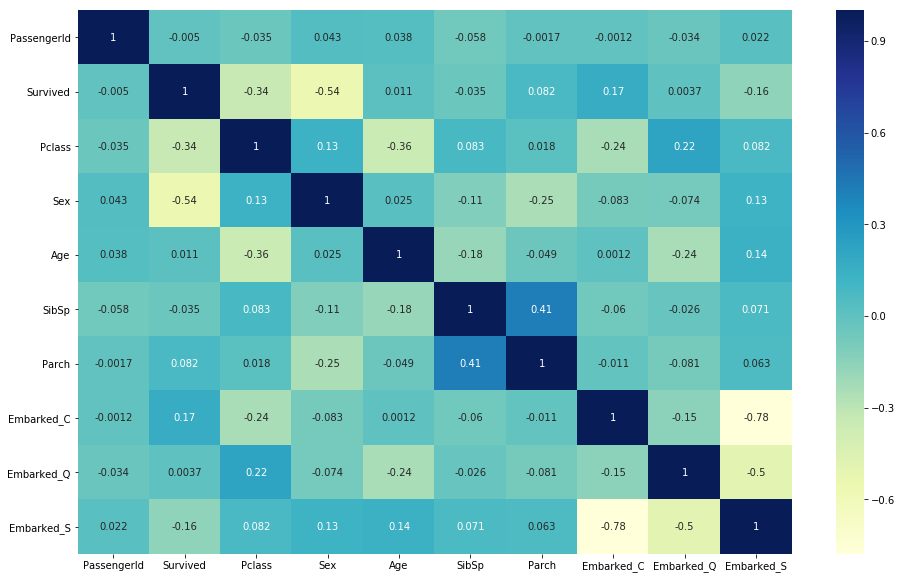

In [131]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
cor=tit1.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
# Putting feature variable to X
X = tit1.drop(['Survived'], axis=1)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,1
4,5,3,1,35.0,0,0,8.0500,0,0,1


In [234]:
# Putting response variable to y
y = tit1['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [235]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [236]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [237]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [238]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
205,206,3,0,2.00,0,1,10.4625,0,0,1
44,45,3,0,19.00,0,0,7.8792,0,1,0
821,822,3,1,27.00,0,0,8.6625,0,0,1
458,459,2,0,50.00,0,0,10.5000,0,0,1
795,796,2,1,39.00,0,0,13.0000,0,0,1
118,119,1,1,24.00,0,1,247.5208,1,0,0
424,425,3,1,18.00,1,1,20.2125,0,0,1
678,679,3,0,43.00,1,6,46.9000,0,0,1
269,270,1,0,35.00,0,0,135.6333,0,0,1
229,230,3,0,0.00,3,1,25.4667,0,0,1


In [239]:
predictions = logreg.predict(X_test)

In [240]:
predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [247]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [248]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
  ## or
  ## accuracy = confusion_matrix(y_test,predictions)

[[140  19]
 [ 38  71]]


In [249]:
# Let's check the overall accuracy.
predictions = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.7873134328358209


### Step 8: Feature Selection Using RFE

In [253]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [254]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [255]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('PassengerId', True, 1),
 ('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1),
 ('C', True, 1),
 ('Q', True, 1),
 ('S', True, 1)]

In [257]:
col = X_train.columns[rfe.support_]
col

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C',
       'Q', 'S'],
      dtype='object')

In [252]:
X_train[col]

KeyError: "['Embarked_C', 'Survived', 'Embarked_Q', 'Embarked_S'] not in index"

In [250]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [258]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,S,18.84
1,Pclass,14.01
7,C,4.87
0,PassengerId,4.05
3,Age,3.46
2,Sex,3.17
8,Q,3.12
6,Fare,2.19
5,Parch,1.64
4,SibSp,1.63


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'S' has the highest VIF. So let's start by dropping that.

In [259]:
col = col.drop('S', 1)
col

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C',
       'Q'],
      dtype='object')

In [260]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      613
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.00
Date:                Sat, 04 Jan 2020   Deviance:                       550.01
Time:                        11:25:19   Pearson chi2:                     646.
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6987      0.569      6.496      0.000       2.583       4.815
PassengerId   9.53e-06      0.000      0.023      0.982      -0.001       0.001
Pclass         -0.9317      0.165     -5.636      0.000      -1.256      -0.608
Sex            -2.8981      0.246    -11.795      0.000      -3.380      -2.417
Age            -0.0148      0.007     -2.204      0.028      -0.028      -0.002
SibSp          -0.2435      0.118     -2.071      0.038      -0.474      -0.013
Parch          -0.1964      0.147     -1.333      0.182      -0.485       0.092
Fare            0.0033      0.003      1.200      0.230      -0.002       0.009
C               0.3840      0.286      1.341      0.180      -0.177       0.946
Q              -0.2531      0.408     -0.621      0.535      -1.052       0.546
===============================================================================
"""

In [262]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [263]:
y_train_pred[:10]

array([0.05538292, 0.43499859, 0.08864278, 0.78545278, 0.46919813,
       0.79777731, 0.95411347, 0.12307006, 0.02628272, 0.91756586])

In [261]:
# Let's check the overall accuracy.
predictions = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.7873134328358209


##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [264]:
y_train_pred_final = pd.DataFrame({'Servive':y_train.values, 'Servive_Prob':y_train_pred})
y_train_pred_final['PassID'] = y_train.index
y_train_pred_final.head()

,Servive,Servive_Prob,PassID
0,0,0.055383,69
1,1,0.434999,85
2,0,0.088643,794
3,1,0.785453,161
4,0,0.469198,815


##### Creating new column 'predicted' with 1 if Servive_Prob > 0.5 else 0

In [265]:
y_train_pred_final['predicted'] = y_train_pred_final.Servive_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Servive,Servive_Prob,PassID,predicted
0,0,0.055383,69,0
1,1,0.434999,85,0
2,0,0.088643,794,0
3,1,0.785453,161,1
4,0,0.469198,815,0


In [266]:
y_train_pred_final['Servive_Prob'] = y_train_pred

In [267]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Servive_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Servive,Servive_Prob,PassID,predicted
0,0,0.055383,69,0
1,1,0.434999,85,0
2,0,0.088643,794,0
3,1,0.785453,161,1
4,0,0.469198,815,0


In [268]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Servive, y_train_pred_final.predicted))

0.8025682182985554


In [269]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Pclass,5.23
0,PassengerId,3.73
2,Sex,2.98
3,Age,2.65
6,Fare,1.78
5,Parch,1.64
4,SibSp,1.62
7,C,1.33
8,Q,1.23


In [270]:
col = col.drop('Pclass', 1)
col

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q'], dtype='object')

In [271]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -290.65
Date:                Sat, 04 Jan 2020   Deviance:                       581.30
Time:                        11:37:12   Pearson chi2:                     615.
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0773      0.317      3.399      0.001       0.456       1.698
PassengerId  9.486e-06      0.000      0.023      0.981      -0.001       0.001
Sex            -2.8155      0.235    -11.989      0.000      -3.276      -2.355
Age            -0.0038      0.006     -0.605      0.545      -0.016       0.009
SibSp          -0.3176      0.116     -2.739      0.006      -0.545      -0.090
Parch          -0.3300      0.144     -2.285      0.022      -0.613      -0.047
Fare            0.0138      0.003      4.269      0.000       0.007       0.020
C               0.5350      0.278      1.927      0.054      -0.009       1.079
Q              -0.5360      0.398     -1.347      0.178      -1.316       0.244
===============================================================================
"""

In [272]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [273]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Servive_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Servive,Servive_Prob,PassID,predicted
0,0,0.055383,69,0
1,1,0.434999,85,0
2,0,0.088643,794,0
3,1,0.785453,161,1
4,0,0.469198,815,0


In [274]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Servive, y_train_pred_final.predicted))

0.8025682182985554


In [275]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [277]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6513761467889908

In [278]:
# Let us calculate specificity
TN / float(TN+FP)

0.8805031446540881

In [279]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11949685534591195


In [280]:
# positive predictive value 
print (TP / float(TP+FP))

0.7888888888888889


In [281]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7865168539325843


### Step 9: Plotting the ROC Curve

In [276]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [283]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Servive, y_train_pred_final.Servive_Prob, drop_intermediate = False )

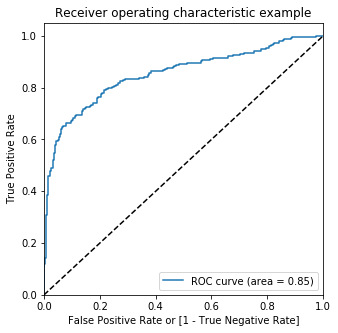

In [284]:
draw_roc(y_train_pred_final.Servive, y_train_pred_final.Servive_Prob)

### Step 10: Finding Optimal Cutoff Point

In [285]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Servive_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Servive,Servive_Prob,PassID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055383,69,0,1,0,0,0,0,0,0,0,0,0
1,1,0.434999,85,0,1,1,1,1,1,0,0,0,0,0
2,0,0.088643,794,0,1,0,0,0,0,0,0,0,0,0
3,1,0.785453,161,1,1,1,1,1,1,1,1,1,0,0
4,0,0.469198,815,0,1,1,1,1,1,0,0,0,0,0


In [286]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Servive, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373997  1.000000  0.000000
0.1   0.1  0.590690  0.909871  0.400000
0.2   0.2  0.712681  0.841202  0.635897
0.3   0.3  0.765650  0.819742  0.733333
0.4   0.4  0.784912  0.742489  0.810256
0.5   0.5  0.802568  0.695279  0.866667
0.6   0.6  0.828250  0.652361  0.933333
0.7   0.7  0.794543  0.506438  0.966667
0.8   0.8  0.757624  0.369099  0.989744
0.9   0.9  0.696629  0.201717  0.992308


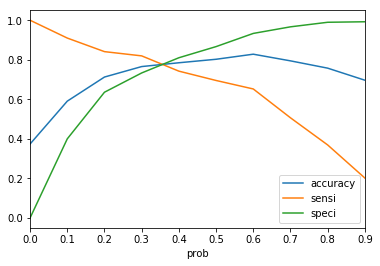

In [287]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [292]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Servive_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Servive,Servive_Prob,PassID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.055383,69,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.434999,85,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.088643,794,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.785453,161,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.469198,815,0,1,1,1,1,1,0,0,0,0,0,1


In [293]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Servive, y_train_pred_final.final_predicted)

0.7849117174959872

In [294]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Servive, y_train_pred_final.final_predicted )
confusion2

array([[316,  74],
       [ 60, 173]], dtype=int64)

### Precision and recall tradeoff

In [295]:
from sklearn.metrics import precision_recall_curve

In [296]:
y_train_pred_final.Servive, y_train_pred_final.predicted

(0      0
 1      1
 2      0
 3      1
 4      0
 5      1
 6      1
 7      0
 8      0
 9      1
 10     0
 11     0
 12     0
 13     0
 14     1
 15     0
 16     1
 17     0
 18     1
 19     1
 20     1
 21     0
 22     0
 23     1
 24     1
 25     1
 26     1
 27     0
 28     1
 29     0
       ..
 593    1
 594    0
 595    0
 596    1
 597    0
 598    0
 599    0
 600    0
 601    0
 602    1
 603    1
 604    1
 605    1
 606    0
 607    0
 608    0
 609    0
 610    1
 611    1
 612    0
 613    0
 614    1
 615    1
 616    0
 617    1
 618    1
 619    1
 620    1
 621    0
 622    1
 Name: Servive, Length: 623, dtype: int64, 0      0
 1      0
 2      0
 3      1
 4      0
 5      1
 6      1
 7      0
 8      0
 9      1
 10     0
 11     0
 12     1
 13     0
 14     1
 15     0
 16     1
 17     0
 18     1
 19     0
 20     0
 21     0
 22     0
 23     0
 24     1
 25     0
 26     0
 27     0
 28     0
 29     0
       ..
 593    1
 594    0
 595    0
 596    

In [320]:
X_test = X_test[col]
X_test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,C,Q
205,206,0,2.0,0,1,10.4625,0,0
44,45,0,19.0,0,0,7.8792,0,1
821,822,1,27.0,0,0,8.6625,0,0
458,459,0,50.0,0,0,10.5000,0,0
795,796,1,39.0,0,0,13.0000,0,0


In [321]:
X_test_sm = sm.add_constant(X_test)

In [322]:
y_test_pred = res.predict(X_test_sm)

In [323]:
y_test_pred[:10]

205    0.708135
44     0.640643
821    0.152684
458    0.738064
795    0.154496
118    0.858264
424    0.102395
678    0.325384
269    0.943894
229    0.537173
dtype: float64

In [324]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [325]:
# Let's see the head
y_pred_1.head()

,0
205,0.708135
44,0.640643
821,0.152684
458,0.738064
795,0.154496


In [326]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [327]:
# Putting CustID to index
y_test_df['PassID'] = y_test_df.index

In [328]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [329]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [330]:
y_pred_final.head()

,Survived,PassID,0
0,0,205,0.708135
1,1,44,0.640643
2,1,821,0.152684
3,1,458,0.738064
4,0,795,0.154496


In [331]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_Prob'})

In [332]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['PassID','Survived','Survived_Prob'], axis=1)

In [333]:
# Let's see the head of y_pred_final
y_pred_final.head()

,PassID,Survived,Survived_Prob
0,205,0,0.708135
1,44,1,0.640643
2,821,1,0.152684
3,458,1,0.738064
4,795,0,0.154496


In [334]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [335]:
y_pred_final.head()

,PassID,Survived,Survived_Prob,final_predicted
0,205,0,0.708135,1
1,44,1,0.640643,1
2,821,1,0.152684,0
3,458,1,0.738064,1
4,795,0,0.154496,0


In [336]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.7761194029850746

In [338]:
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
confusion2

array([[137,  22],
       [ 38,  71]], dtype=int64)

In [339]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [340]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6513761467889908

In [341]:
# Let us calculate specificity
TN / float(TN+FP)

0.8616352201257862

In [388]:
## Loading testing data
titanic_test = pd.read_csv('test.csv')

In [389]:
col

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q'], dtype='object')

In [416]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [391]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy2 = pd.get_dummies(titanic_test['Embarked'])
# Adding the results to the master dataframe
titanic_test = pd.concat([titanic_test, dummy2], axis=1)


In [392]:
titanic_test.drop('Embarked',axis=1,inplace=True)

In [393]:
titanic_test['Sex'].replace('female',0,inplace=True)
titanic_test['Sex'].replace('male',1,inplace=True)

In [396]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0,0,1


In [425]:
X_test_res = titanic_test[col]
X_test_res.head(2)

,PassengerId,Sex,Age,SibSp,Parch,Fare,C,Q
0,892,1,34.5,0,0,7.8292,0,1
1,893,0,47.0,1,0,7.0000,0,0


In [424]:
X_test.head(2)

,PassengerId,Sex,Age,SibSp,Parch,Fare,C,Q
205,206,0,2.0,0,1,10.4625,0,0
44,45,0,19.0,0,0,7.8792,0,1


In [426]:
test_x = X_test_res.drop('PassengerId',axis=1)
test_x.head(2)

,Sex,Age,SibSp,Parch,Fare,C,Q
0,1,34.5,0,0,7.8292,0,1
1,0,47.0,1,0,7.0000,0,0


In [428]:
predictions = logm4.predict(X_test_res)

ValueError: shapes (623,9) and (418,8) not aligned: 9 (dim 1) != 418 (dim 0)

In [397]:
X_test_sm1 = sm.add_constant(X_test_res)

In [415]:
y_test_pred_res = res.predict(X_test_sm1)
y_test_pred_res[:10]

0    0.092022
1    0.664957
2    0.085608
3    0.152774
4    0.628116
5    0.160359
6    0.631994
7    0.111515
8    0.839167
9    0.108034
dtype: float64

In [412]:
# Converting y_test_pred_res to a dataframe which is an array
y_pred_1_res = pd.DataFrame(y_test_pred_res)

,0
0,0.092022
1,0.664957
2,0.085608
3,0.152774
4,0.628116
5,0.160359
6,0.631994
7,0.111515
8,0.839167
9,0.108034


In [413]:
# Let's see the head
y_pred_1_res.head()

,0
0,0.092022
1,0.664957
2,0.085608
3,0.152774
4,0.628116


In [401]:
# Converting y_test to dataframe
y_test_df_res = pd.DataFrame(y_pred_test)

In [402]:
# Putting CustID to index
y_test_df_res['PassID'] = y_test_df_res.index

In [403]:
y_test_df_res.head()

,0,PassID
0,0.708135,0
1,0.640643,1
2,0.152684,2
3,0.738064,3
4,0.154496,4


In [404]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df_res.reset_index(drop=True, inplace=True)




In [405]:
print(pd.concat([y_test_, y_pred_test],axis=1))

            0  PassID         0  PassID
0    0.708135       0  0.708135       0
1    0.640643       1  0.640643       1
2    0.152684       2  0.152684       2
3    0.738064       3  0.738064       3
4    0.154496       4  0.154496       4
5    0.858264       5  0.858264       5
6    0.102395       6  0.102395       6
7    0.325384       7  0.325384       7
8    0.943894       8  0.943894       8
9    0.537173       9  0.537173       9
10   0.973931      10  0.973931      10
11   0.152013      11  0.152013      11
12   0.131097      12  0.131097      12
13   0.676637      13  0.676637      13
14   0.513923      14  0.513923      14
15   0.234682      15  0.234682      15
16   0.793605      16  0.793605      16
17   0.181363      17  0.181363      17
18   0.101506      18  0.101506      18
19   0.153572      19  0.153572      19
20   0.164753      20  0.164753      20
21   0.966251      21  0.966251      21
22   0.155004      22  0.155004      22
23   0.749720      23  0.749720      23


In [371]:
# Appending y_test_df and y_pred_1
y_pred_test_final = pd.concat([y_test_, y_pred_test],axis=1)


y_pred_test_final.head()

,0,PassID,0,PassID
0,0.708135,205,0.708135,205
1,0.640643,44,0.640643,44
2,0.152684,821,0.152684,821
3,0.738064,458,0.738064,458
4,0.154496,795,0.154496,795


In [386]:
# Renaming the column 
y_pred_test_final= y_pred_test_final.rename(columns={ 0 : 'Survived_Prob'})


In [ ]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['PassID','Survived','Survived_Prob'], axis=1)